In [1]:
# encoder based on tensorflow documentation 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [2]:
# normalize 
(x_train, _) , (x_test,_) = mnist.load_data()  # as we don't need dependent variable from dataset

x_train = x_train.astype('float32') / 255.   # normalize from rgb scale to 0-1
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [13]:
# basic autoencoder -> compression to less dimensional vector and then decompression to same dimenisonality as original image.
# with usage of API Keras Model Subclassing 
latent_dim = 32 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(28*28, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [14]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())   # choosing compiler 

In [15]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - loss: 0.0530 - val_loss: 0.0166
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - loss: 0.0151 - val_loss: 0.0114
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - loss: 0.0114 - val_loss: 0.0106
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - loss: 0.0108 - val_loss: 0.0103
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - loss: 0.0106 - val_loss: 0.0101
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - loss: 0.0104 - val_loss: 0.0101
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - loss: 0.0103 - val_loss: 0.0100
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - loss: 0.0103 - val_loss: 0.0100
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - loss: 0.0103 - val_loss: 0.0099
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - loss: 0.0101 - val_loss: 0.0098


In [16]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

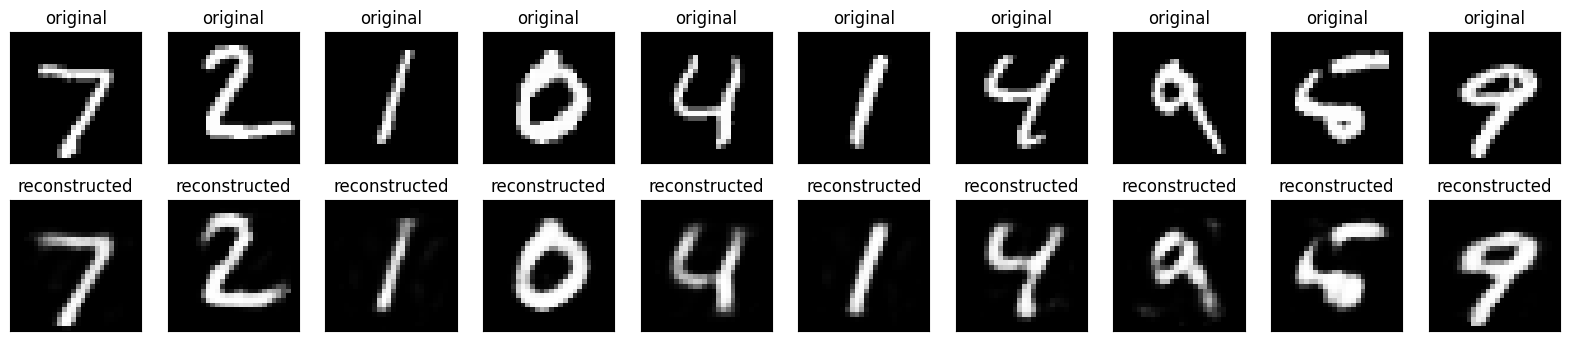

In [17]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()